In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
import sys
import os
sys.path.append(os.path.abspath("../implementations")) 
from ukf import UnscentedKalmanFilter

In [6]:
# Nonlinear state transition function
def f(x, u=None):
    dt = 0.1
    return np.array([x[0] + dt * np.sin(x[0])])

# Nonlinear measurement function
def h(x):
    return np.array([np.sin(x[0])])

In [10]:
np.random.seed(0)
N = 100  # time steps

true_states = []
measurements = []
estimated_states = []

# Initial state
x_true = np.array([0.5])
x_est = np.array([0.0])
P = np.eye(1) * 0.1
Q = np.eye(1) * 0.01  # process noise
R = np.eye(1) * 0.05  # measurement noise

ukf = UnscentedKalmanFilter(f=f, h=h, Q=Q, R=R, P=P, x0=x_est)

for t in range(N):
    # True system evolution
    x_true = f(x_true) + np.random.multivariate_normal(mean=[0], cov=Q)
    z = h(x_true) + np.random.multivariate_normal(mean=[0], cov=R)
    
    # UKF prediction and update
    ukf.predict()
    x_est = ukf.update(z)
    
    # Store for plotting
    true_states.append(x_true[0])
    measurements.append(z[0])
    estimated_states.append(x_est[0])


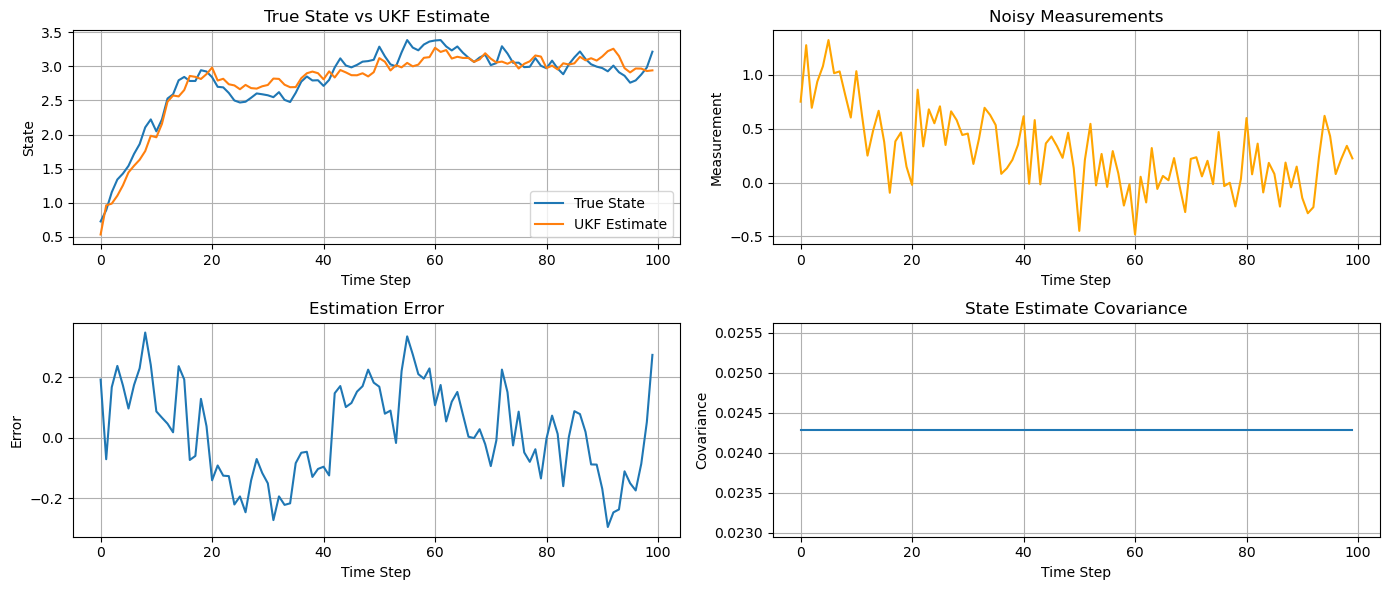

In [ ]:
time = np.arange(N)

plt.figure(figsize=(14, 6))

# True vs Estimated
plt.subplot(2, 2, 1)
plt.plot(time, true_states, label='True State')
plt.plot(time, estimated_states, label='UKF Estimate')
plt.title('True State vs UKF Estimate')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()


# Measurements
plt.subplot(2, 2, 2)
plt.plot(time, measurements, label='Measurements', color='orange')
plt.title('Noisy Measurements')
plt.xlabel('Time Step')
plt.ylabel('Measurement')
plt.grid(True)

# Estimation Error
plt.subplot(2, 2, 3)
error = np.array(true_states) - np.array(estimated_states)
plt.plot(time, error, label='Estimation Error')
plt.title('Estimation Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.grid(True)

# Covariance Trace
plt.subplot(2, 2, 4)
cov_trace = [ukf.get_covariance()[0, 0] for _ in range(N)]
plt.plot(time, cov_trace, label='Covariance (P[0,0])')
plt.title('State Estimate Covariance')
plt.xlabel('Time Step')
plt.ylabel('Covariance')
plt.tight_layout()
plt.show()
